<a href="https://colab.research.google.com/github/mari967/GDD-GuiaSQL/blob/master/Simulaci%C3%B3n_Remiseria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TP6 - Simulación para "Remises Delta" Nuñez



## Variables 

>Datos | Control | Estado | Resultado 
> ---|---|---|---    
> FLLP | N | TCR(i)|PTO(i)
>KDV | CVD | CVUD(i)|PTEC
>|||PGDD 


In [0]:
cant_simulaciones = 10
TPP = 0
T = 0
TF = 2000
TV = 0

FLLP = 0
KDV = 0

CVD = 5
N = 10

TC = []
CVUD = []
NT = 0

TPD = []

PTO = []
PTE = []
PTET = []  # total
PDDD = []
PTORN = []
STE = 0
STO = []

se_arrepiente = False
GASTO = 0
GV = 0


In [0]:
import math
import random

def generar_kdv(): return 11.323 * math.pow(math.pow(1 - random.random(), -1 / 0.70622) - 1, 1 / 2.6286)

def generar_fllp(): return 12.625 * math.pow(math.pow(1 - random.random(), -1 / 0.86891) - 1, 1 / 2.1342)

def llenar_listas():
    global TC, NT, STE, CVUD, STO, TPD
    for z in range(N):
        TC.append(0)
        CVUD.append(0)
        STO.append(0)
        TPD.append(999999)
    return

def tpp_es_menor():
    global TPP, TPD, N
    respuesta = True
    for j in range(N):
        if TPP > TPD[j]:
            respuesta = False
    return respuesta

def buscar_menor_tc():
    pos = 0
    mini = TC[0]
    for k in range(N):
        if TC[k] < mini:
            mini = TC[k]
            pos = k
    return pos

def arrepentimiento(espera):
    if espera > 15:
        return random.random() > 0.5
    else:
        return False

def menor_tpd():
    indice = 0
    minimo = TPD[0]
    for d in range(N):
        if TPD[d] < minimo:
            minimo = TPD[d]
            indice = d
    TPD[indice] = 999999  # ################# al menor tpd le pongo HV
    return minimo

def vaciar_listas():
    global TPP, T, FLLP, KDV, TV, se_arrepiente, GASTO, GV, C, TC, NT, STE, CVUD, STO, TPD
    TPP = 0
    T = 0
    FLLP = 0
    KDV = 0
    TV = 0
    se_arrepiente = False
    GASTO = 0
    GV = 0
    STE = 0
    NT = 0
    for i in range(N):
        TC[i] = 0
        CVUD[i] = 0
        STO[i] = 0
        TPD[i] = 999999
    return

def simular(n, cvd):
    global TPP, T, FLLP, KDV, TV, se_arrepiente, GASTO, GV, C, TC, NT, STE, CVUD, STO, TPD, N, CVD
    N = n
    CVD = cvd
    vaciar_listas()
    vuelta = 0
    while T < TF:
        print("vuelta " + str(vuelta))
        vuelta += 1
        if tpp_es_menor():
            T = TPP
            print("tiempo: " + str(T))
            FLLP = generar_fllp()
            TPP = T + FLLP
            i = buscar_menor_tc()
            KDV = generar_kdv()
            TV = (KDV * 60) / 22
            tiempo_de_espera = TC[i] - T
            se_arrepiente = arrepentimiento(tiempo_de_espera)
            if not se_arrepiente:
                if T < TC[i]:  # ######### tiene que esperar
                    STE += TC[i] - T
                    TC[i] += TV
                else:  # ################# lo lleva a tiempo
                    STO[i] += T - TC[i]  # sumo el tiempo ocioso
                    TC[i] = T + TV
                if KDV <= 3:
                    GV += 3 * 33 * 0.2
                else:
                    GV += KDV * 33 * 0.2
                GASTO += 0.85  # ######### alcohol en gel
                CVUD[i] += 1
                if CVUD[i] == CVD:  # #### en la proxima tiene que desinfectar
                    TPD[i] = TC[i]  # #### actualizo el tiempo de prox desinf
                    TC[i] += 10  # ####### y lo sumo al TC
                    CVUD[i] = 0
                    GASTO += 200
                NT += 1
        else:  # ######################### es una desinfección
            T = menor_tpd()

    STOR = 0
    PTET.append(STE / NT)
    PDDD.append(GASTO * 100 / GV)
    print("\n----RESULTADOS----\n")
    for k in range(N):
        if len(PTO) >= N:
            PTO[k] = (STO[k] * 100) / T
        else:
            PTO.append((STO[k] * 100) / T)
        print("remisero " + str(k))
        print("Promedio de tiempo ocioso: " + str(PTO[k]))
        STOR += PTO[k] # Promedio del pto de cada remis.
    PTORN.append((STOR * 100) / T) # Promedio de las simulaciones.
    print("")
    print("Porcentaje de tiempo ocioso de los remiseros: " + str((STOR * 100) / T))
    print("Promedio de tiempo de espera de los clientes: " + str(PTET[j]))
    print("Porcentaje de dinero destinado a desinfección: " + str(PDDD[j]))
    print("Simulación: (" + str(N) + ", " + str(CVD) + ")")
    print("")

# MAIN
if __name__ == "__main__":
    llenar_listas()
    for i in range(10):
        for j in range(5):
            simular(i + 1, j + 1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
tiempo: 540.3518671002951
vuelta 39
tiempo: 559.8124295890152
vuelta 40
tiempo: 569.9383032035502
vuelta 41
tiempo: 590.186538435996
vuelta 42
tiempo: 599.2104592692311
vuelta 43
tiempo: 620.5784772275283
vuelta 44
vuelta 45
tiempo: 1033.4994538220953
vuelta 46
tiempo: 1071.542159828967
vuelta 47
tiempo: 1080.2574453138254
vuelta 48
vuelta 49
tiempo: 1111.7728109219727
vuelta 50
vuelta 51
vuelta 52
tiempo: 1139.4177850236447
vuelta 53
tiempo: 1169.477393249821
vuelta 54
tiempo: 1206.2630053571263
vuelta 55
tiempo: 1216.0639010439293
vuelta 56
tiempo: 1218.8094894598642
vuelta 57
vuelta 58
tiempo: 1252.0601780082761
vuelta 59
tiempo: 1279.4068229226355
vuelta 60
tiempo: 1293.018137728999
vuelta 61
vuelta 62
tiempo: 1318.951936320558
vuelta 63
tiempo: 1345.1342564999497
vuelta 64
tiempo: 1368.2772433128505
vuelta 65
tiempo: 1373.6633604471094
vuelta 66
tiempo: 1393.4485129065984
vuelta 67
tiempo: 1432.2162087554318
vuelta

## Resultados

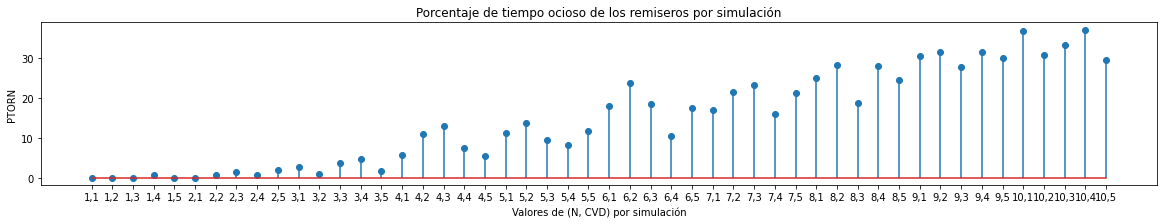

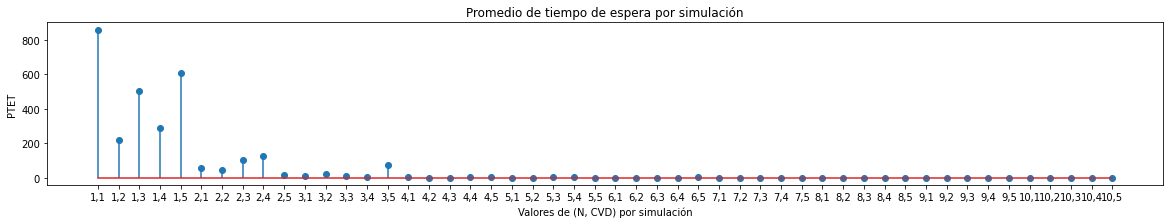

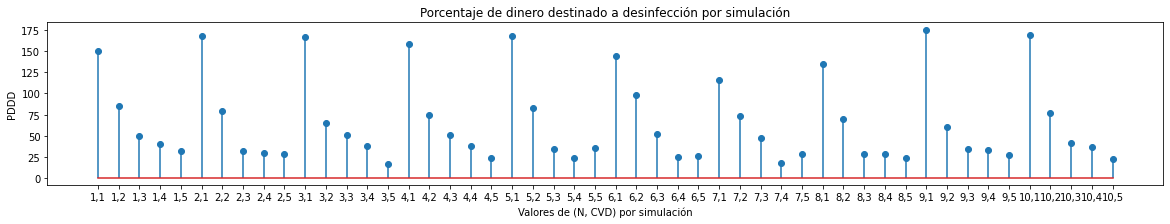

In [0]:
from matplotlib import pyplot as plt

def graficar(listax, listay, titulo_graf, nombre_ejex, nombre_ejey):
  data = list(zip(listax,listay))
  labels, y = zip(*data)

  x = range(len(y))
  plt.rcParams["figure.figsize"] = (20, 3)
  plt.stem(x, y, use_line_collection=True)
  plt.xticks(x, labels)
  plt.xlabel(nombre_ejex)
  plt.ylabel(nombre_ejey)
  plt.title(titulo_graf)
  plt.show()

nro_simulacion = [str(i // CVD + 1) + "," + str(i % CVD + 1) for i in range(N * CVD)]

graficar(nro_simulacion, PTORN, "Porcentaje de tiempo ocioso de los remiseros por simulación", "Valores de (N, CVD) por simulación", "PTORN")
graficar(nro_simulacion, PTET, "Promedio de tiempo de espera por simulación", "Valores de (N, CVD) por simulación", "PTET")
graficar(nro_simulacion, PDDD, "Porcentaje de dinero destinado a desinfección por simulación", "Valores de (N, CVD) por simulación", "PDDD")